- fit a model to the train images of a 0 and the train images of a 1
- compute and plot the energy distribution for all test images for both models

- in the end, i would like to have a histogram with two distributions. One for ISING model of 1 one for ISING model of 0.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")
from src.pairwise_fitter import Pairwise_fitter
from pairwise_evaluator import Pairwise_evaluator
import os

In [2]:
# fit the ising model to each digit
def fit_digit(digit,nspin, seed,nsamples,fname = "train-images-unlabeled-{}",\
                inalldir_rel="../../INPUT_all/data/traindata",outdir_rel="../../OUTPUT_mod/data",exe_rel="../../ace_utils/ace"):
    mod = Pairwise_fitter(nsamples,inalldir_rel,fname.format(digit), outdir_rel)
    mod.setup(seed,input_spaced=False)
    mod.fit("ace",exe_rel)




Fitting the models

In [3]:
# for digit in [0,1]:
    # nspin = 121
    # seed = 42
    # nsamples = 4000
    # fit_digit(digit,nspin, seed,nsamples)


Evaluate both models for test data.

In [4]:

def get_mod_digit(digit,nspin,fname="train-images-unlabeled-{}",outdir="../../OUTPUT_mod/data"):
    fname = fname.format(digit)
    jpath = os.path.join(outdir,fname,fname+"_sep-output-out.j")
    mod = Pairwise_evaluator(jpath, nspin)
    mod.load_ising_paramters()
    return mod

In [5]:
nspin = 121
digits = [0,1]
mods = [get_mod_digit(i,nspin) for i in digits] # both models were stopped after 100 iterations of the ACE algorithm

In [6]:
# load test data (function 1:1 from paper_utils)
def load_test_data(digit):
        all_data_path="../../INPUT_all/data/testdata_separated"
        file = "test-images-unlabeled-{}.dat".format(digit)
        return np.loadtxt(os.path.join(all_data_path,file), dtype="str")


In [7]:
testdatas = [np.genfromtxt(load_test_data(digit), dtype=int, delimiter=1) for digit in digits]

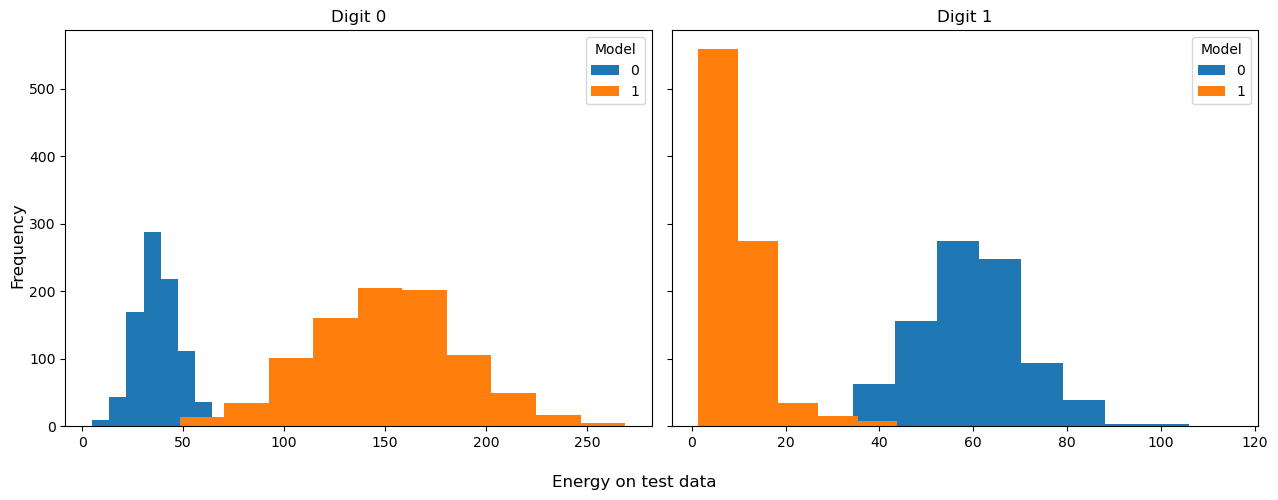

In [11]:
model_digits = [0,1]

fig, axs = plt.subplots(1,2,sharey=True,figsize=((13,5)))

for see_dig, ax in enumerate(axs):
    
    for md in model_digits:
        distrE = [mods[md].calc_energy(state) for state in testdatas[see_dig]]
        ax.hist(distrE,label=md)

    ax.set_title(f"Digit {see_dig}")
    ax.legend(title="Model")

fig.supxlabel("Energy on test data")
fig.supylabel("Frequency")
fig.tight_layout()
    